# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [21]:
# Python's SQLite library 
import sqlite3
# Connects to the SQLite database
import pandas as pd 
# Reads data from the database into a dataframe, etc...
import seaborn as sns
# For plotting data
import matplotlib.pyplot as plt

In [22]:
# TODO: Set up a connection the "Market.db" database
conn = sqlite3.connect('db/Market.db')

# TODO: Set up the cursor
cursor=conn.cursor()


### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [37]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT COUNT(*) AS 'num_Products < €10'
FROM Products p 
WHERE p.price < 10
""")

products = cursor.fetchall()
for product in products:
    print(product[0])

11


### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [38]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT country, count(*) AS num_suppliers
FROM suppliers 
GROUP BY country 
ORDER BY num_suppliers DESC
limit 10;
""")

# TODO: Fetch your list of tuples and print it out
num_suppliers = cursor.fetchall()
#num_suppliers_df
for num_supplier in num_suppliers:
    print(num_supplier)

('USA', 4)
('Germany', 3)
('France', 3)
('UK', 2)
('Sweden', 2)
('Japan', 2)
('Italy', 2)
('Canada', 2)
('Australia', 2)
('Spain', 1)


In [40]:
num_suppliers

[('USA', 4),
 ('Germany', 3),
 ('France', 3),
 ('UK', 2),
 ('Sweden', 2),
 ('Japan', 2),
 ('Italy', 2),
 ('Canada', 2),
 ('Australia', 2),
 ('Spain', 1)]

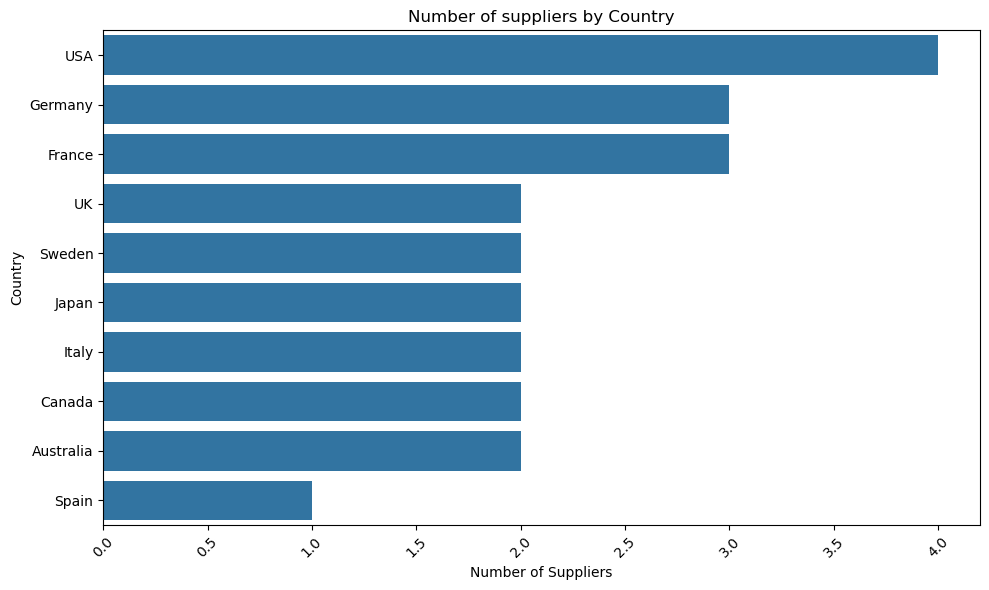

In [39]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(num_suppliers, columns=['country', 'num_suppliers'])


# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10,6))
sns.barplot(x='num_suppliers', y='country', data=df)
plt.title('Number of suppliers by Country')
plt.xlabel('Number of Suppliers')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()

### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [44]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT Country, COUNT(*) AS num_customer
FROM Customers
GROUP BY Country 
ORDER BY num_customer DESC
Limit 10;
""")

# TODO: Fetch your list of tuples and print it out
num_customers = cursor.fetchall()
for num_customer in num_customers:
    print(num_customer)


('USA', 13)
('Germany', 11)
('France', 11)
('Brazil', 9)
('UK', 7)
('Spain', 5)
('Mexico', 5)
('Venezuela', 4)
('Italy', 3)
('Canada', 3)


In [45]:
num_customers


[('USA', 13),
 ('Germany', 11),
 ('France', 11),
 ('Brazil', 9),
 ('UK', 7),
 ('Spain', 5),
 ('Mexico', 5),
 ('Venezuela', 4),
 ('Italy', 3),
 ('Canada', 3)]

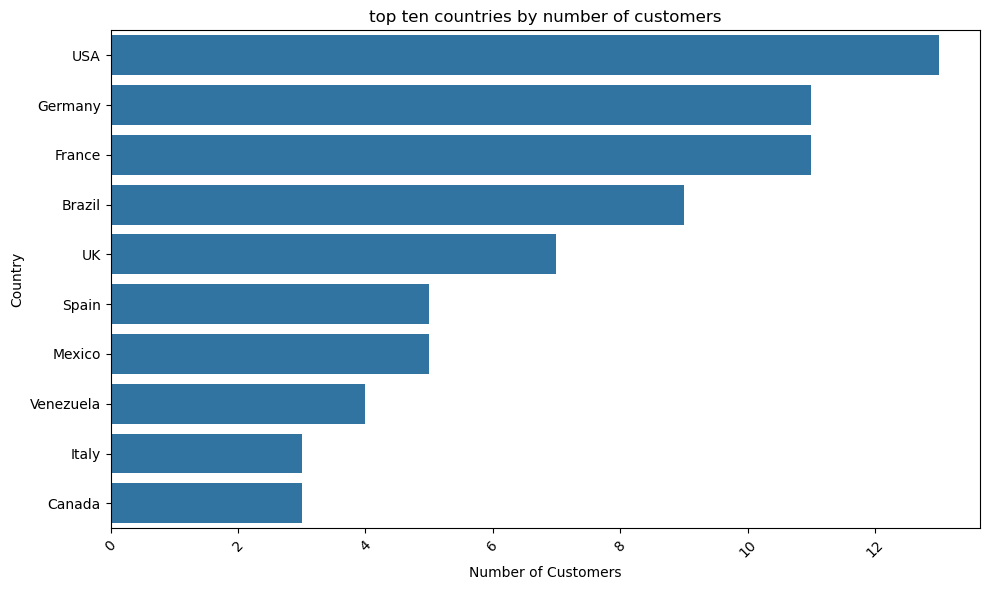

In [48]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(num_customers, columns=['Country', 'num_customer'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10,6))
sns.barplot(x='num_customer', y='Country', data=df)
plt.title('top ten countries by number of customers')
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()

### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [116]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT p.ProductName, SUM(od.Quantity) AS total_quantity_ordered
FROM products p LEFT JOIN OrderDetails od 
ON p.ProductID = od.ProductID
GROUP BY ProductName 
ORDER BY total_quantity_ordered ASC
LIMIT 20;
""")

# TODO: Fetch your list of tuples and print it out
total_quantity_df = cursor.fetchall()
total_quantity_df


[('Laughing Lumberjack Lager', 5),
 ('Røgede sild', 15),
 ("Gustaf's Knäckebröd", 18),
 ('Mishi Kobe Niku', 20),
 ('Genen Shouyu', 25),
 ("Uncle Bob's Organic Dried Pears", 25),
 ('Queso Manchego La Pastora', 27),
 ("Grandma's Boysenberry Spread", 36),
 ('Gravad lax', 39),
 ('Röd Kaviar', 45),
 ('Filo Mix', 48),
 ('Mascarpone Fabioli', 52),
 ('Chocolade', 70),
 ('Valkoinen suklaa', 70),
 ('NuNuCa Nuß-Nougat-Creme', 71),
 ('Singaporean Hokkien Fried Mee', 77),
 ('Aniseed Syrup', 80),
 ('Ikura', 85),
 ('Louisiana Hot Spiced Okra', 90),
 ('Schoggi Schokolade', 90)]

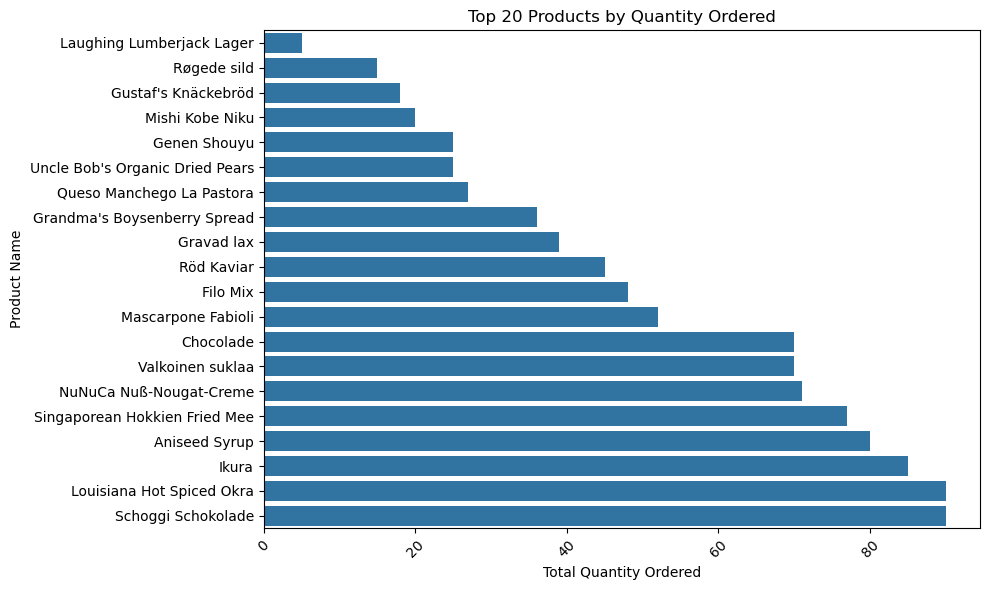

In [ ]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(total_quantity_df, columns=['product_name', 'total_quantity_ordered'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10,6))
sns.barplot(x='total_quantity_ordered', y='product_name', data=df)
plt.title('Top 20 Products by Quantity Ordered')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Product Name')
plt.xticks(rotation=45)
plt.tight_layout()

### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute(""" 
SELECT p.ProductName, SUM(od.Quantity * p.Price) AS total_revenue
FROM products p LEFT JOIN OrderDetails od 
ON p.ProductID = od.ProductID
GROUP BY ProductName 
ORDER BY total_revenue ASC
LIMIT 20;             
""")

# TODO: Fetch your list of tuples and print it out
total_revenue_df = cursor.fetchall()
total_revenue_df

[('Laughing Lumberjack Lager', 70),
 ('Røgede sild', 142.5),
 ('Filo Mix', 336),
 ("Gustaf's Knäckebröd", 378),
 ('Genen Shouyu', 387.5),
 ('Konbu', 552),
 ('Röd Kaviar', 675),
 ('Guaraná Fantástica', 711.0),
 ("Uncle Bob's Organic Dried Pears", 750),
 ('Geitost', 790.0),
 ('Aniseed Syrup', 800),
 ('Chocolade', 892.5),
 ("Grandma's Boysenberry Spread", 900),
 ('Zaanse koeken', 959.5),
 ('NuNuCa Nuß-Nougat-Creme', 994),
 ('Gravad lax', 1014),
 ('Queso Manchego La Pastora', 1026),
 ('Singaporean Hokkien Fried Mee', 1078),
 ('Rhönbräu Klosterbier', 1116.0),
 ('Valkoinen suklaa', 1137.5)]

Text(0, 0.5, 'Poduct Name')

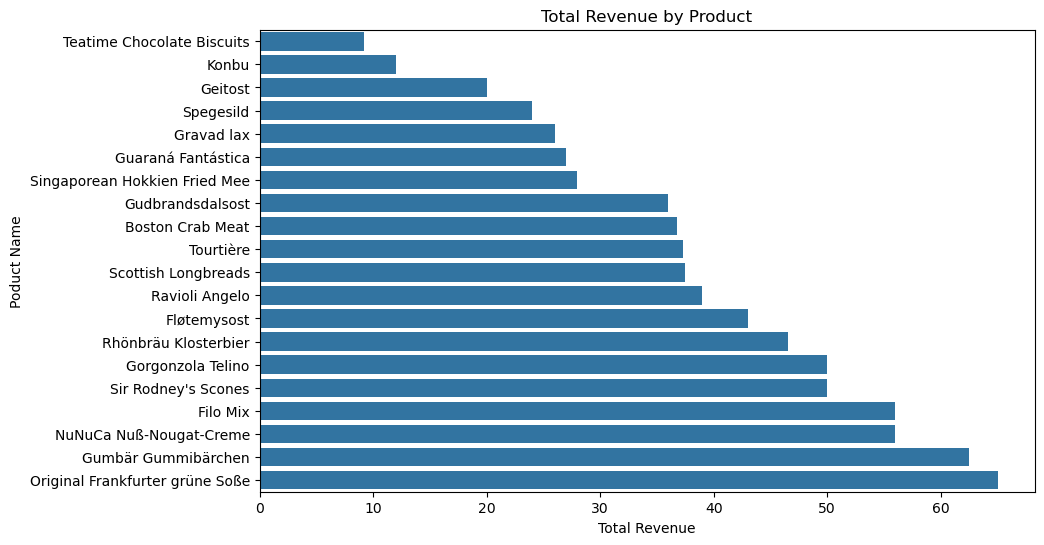

In [ ]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(total_revenue_df, columns=['ProductName', 'total_revenue'])


# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10,6))
sns.barplot(x='total_revenue', y='ProductName', data=df)
plt.title('Total Revenue by Product')
plt.xlabel('Total Revenue')
plt.ylabel('Poduct Name')

### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute(""" 
SELECT c.country, COUNT(o.OrderID) AS total_orders
FROM Orders o JOIN Customers c 
ON o.CustomerID = c.CustomerID
GROUP BY c.Country 
ORDER BY total_orders DESC
Limit 10;
""")
# TODO: Fetch your list of tuples and print it out
total_orders_df = cursor.fetchall()
total_orders_df

[('USA', 29),
 ('Germany', 25),
 ('Brazil', 19),
 ('France', 18),
 ('Austria', 13),
 ('UK', 12),
 ('Venezuela', 9),
 ('Mexico', 9),
 ('Canada', 9),
 ('Finland', 8),
 ('Sweden', 7),
 ('Spain', 7),
 ('Italy', 7),
 ('Ireland', 6),
 ('Portugal', 5),
 ('Switzerland', 4),
 ('Denmark', 4),
 ('Belgium', 2),
 ('Poland', 1),
 ('Norway', 1),
 ('Argentina', 1)]

Text(0.5, 0, 'Total Orders')

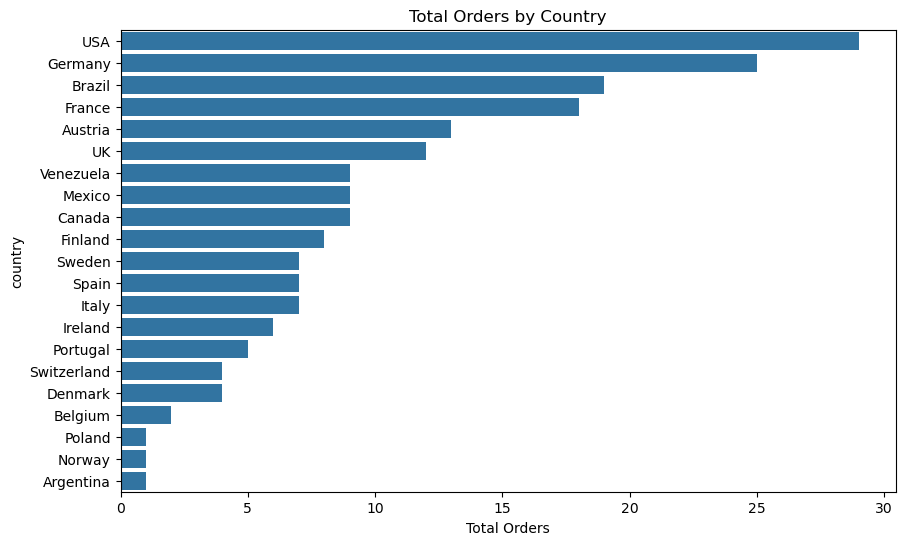

In [ ]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(total_orders_df, columns=['country', 'total_orders'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10,6))
sns.barplot(x='total_orders', y='country', data=df)
plt.title('Total Orders by Country')
plt.xlabel('Total Orders')
plt.ylabel('Country')
plt.xticks(totation=45)
plt.tight_layout()

### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute(""" 
 SELECT country, COUNT(*) AS no_orders
FROM Customers c LEFT JOIN Orders o 
ON c.CustomerID = o.CustomerID
WHERE o.OrderID IS null
GROUP BY country
ORDER BY no_orders DESC;
""")

# TODO: Fetch your list of tuples and print it out
no_orders_df = cursor.fetchall()
no_orders_df

[('USA', 5),
 ('France', 4),
 ('Germany', 2),
 ('Argentina', 2),
 ('UK', 1),
 ('Spain', 1),
 ('Canada', 1),
 ('Belgium', 1)]

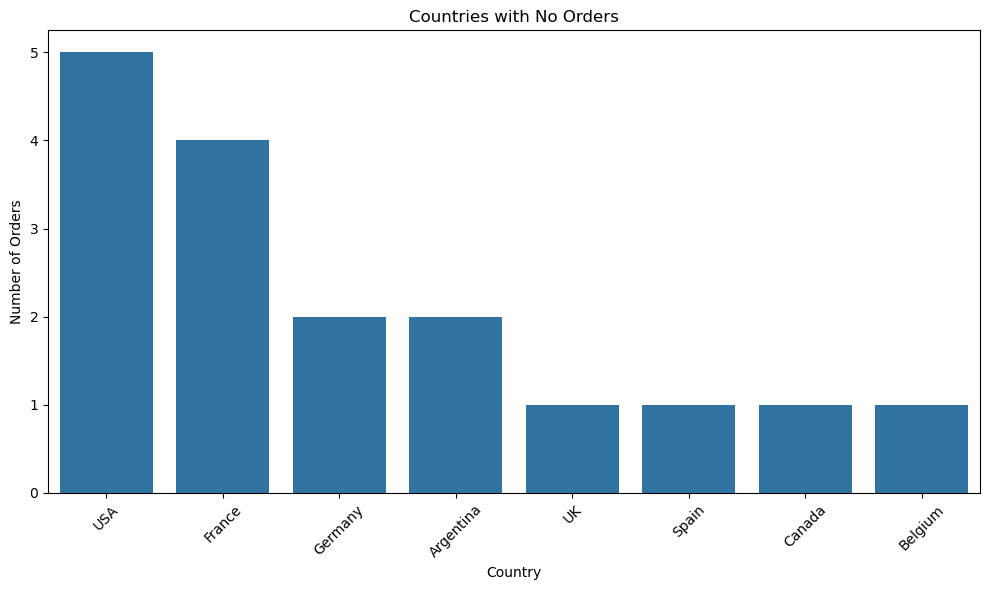

In [ ]:
# TODO: Convert your list of tuples to a dataframe
df  = pd.DataFrame(no_orders_df, columns=['Country', 'no_orders'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10,6))
sns.barplot(x='Country', y='no_orders', data=df)
plt.title('Countries with No Orders')
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()

### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute(""" 
SELECT s.SupplierName, count(*) AS most_popular
FROM Suppliers s 
JOIN Products p ON s.SupplierID = p.SupplierID
JOIN OrderDetails od ON p.ProductID = od.ProductID
GROUP BY s.SupplierName 
ORDER BY most_popular DESC
LIMIT 10; 
""")

# TODO: Fetch your list of tuples and print it out
most_popular_df = cursor.fetchall()
most_popular_df

[('Plutzer Lebensmittelgroßmärkte AG', 42),
 ('Pavlova, Ltd.', 40),
 ('Specialty Biscuits, Ltd.', 33),
 ('Norske Meierier', 32),
 ('Formaggi Fortini s.r.l.', 31),
 ('Gai pâturage', 26),
 ('Exotic Liquid', 21),
 ('Pasta Buttini s.r.l.', 20),
 ('New Orleans Cajun Delights', 20),
 ('Ma Maison', 19)]

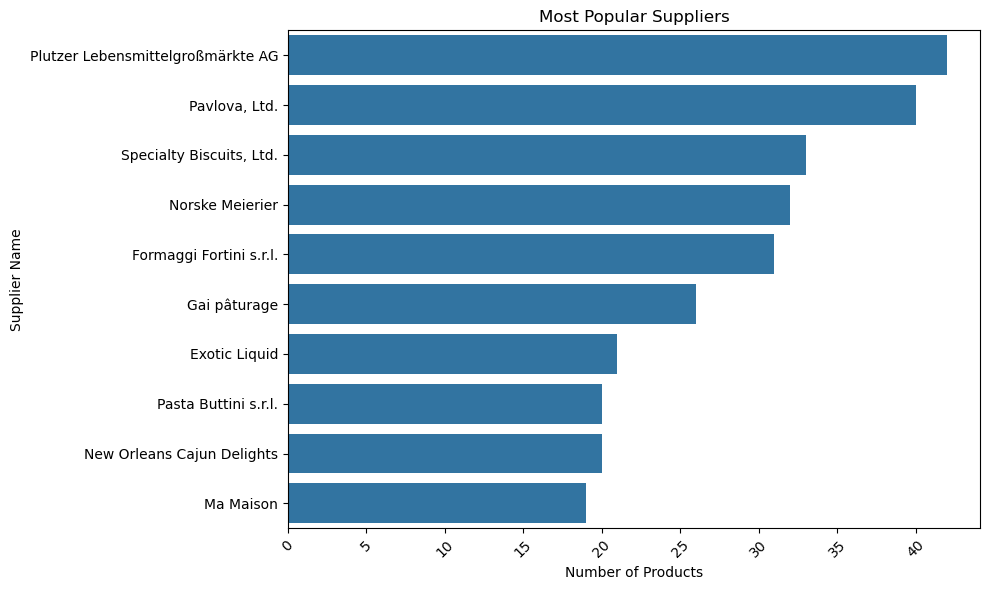

In [ ]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(most_popular_df, columns=['SupplierName', 'most_popular'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10,6))
sns.barplot(x='most_popular', y='SupplierName', data=df)
plt.title('Most Popular Suppliers')
plt.xlabel('Number of Products')
plt.ylabel('Supplier Name')
plt.xticks(rotation=45)
plt.tight_layout()

In [58]:
# create dataframes for number of customer and suppliers by country
num_customers_df = pd.DataFrame(num_customers, columns=['Country', 'num_custoemrs'])
num_suppliers_df = pd.DataFrame(num_suppliers, columns=['Country', 'num_suppliers'])

In [ ]:
# merged dataframes of customers and suppliers by country
sup_cus_merge_df = pd.merge(num_customers_df, num_suppliers_df, on='Country', how='outer').fillna(0)
num_customers_df['num_custoemrs'] = num_customers_df['num_custoemrs'].astype(int)
num_suppliers_df['num_suppliers'] = num_suppliers_df['num_suppliers'].astype(int)


,Country,num_custoemrs,num_suppliers
0,Australia,0.0,2.0
1,Brazil,9.0,0.0
2,Canada,3.0,2.0
3,France,11.0,3.0
4,Germany,11.0,3.0
5,Italy,3.0,2.0
6,Japan,0.0,2.0
7,Mexico,5.0,0.0
8,Spain,5.0,1.0
9,Sweden,0.0,2.0


In [67]:
# Fix spelling before merge
num_customers_df.rename(columns={'num_custoemrs': 'num_customers'}, inplace=True)

# Merge and clean
sup_cus_merge_df = pd.merge(num_customers_df, num_suppliers_df, on='Country', how='outer').fillna(0)
sup_cus_merge_df['num_customers'] = sup_cus_merge_df['num_customers'].astype(int)
sup_cus_merge_df['num_suppliers'] = sup_cus_merge_df['num_suppliers'].astype(int)

## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?

According to the dataset and bar graph, USA, Germany, and France have the highest number of customers with USA=13, Germany=11, and France=11. 

### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

[Answer Here]

### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

[Answer Here]

### Question 4

Which supplier has the most orders? Which evidence supports your answer?

[Answer Here]